<h1>When S<sub>baggage</sub> = 0.1 and S<sub>gains</sub> = 1 and num_reps =1000</h1>

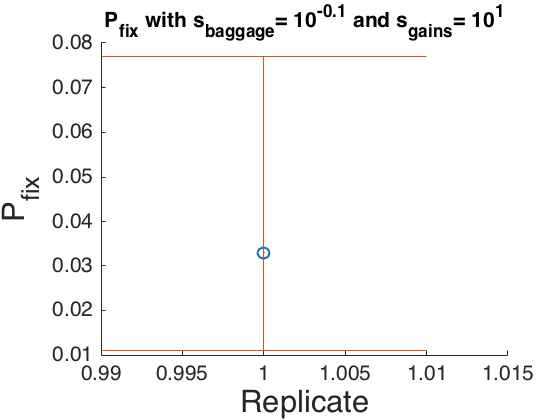

phat =

    0.0330


ci =

    0.0441    0.0219

In [3]:
 %General Parameters
        N = 1000; %population size 
        num_loci = 1000;%number of loci in accessory genome
        m = [10]; %m = [1, 10,50, 100, 1000, 10000];
        mu_1 =  10^(-7);%mutation rate
        mu_2 = 100*mu_1;
        rev_mut = .001;
        num_essential = round(.25*num_loci);

    %scalar values of some things
        s_baggage = .1;%costs
        s_gains = 1; 
        frac_needed_scalar = .1; %fraction_needed 
        alpha= 1.96;
    %vector values of the same things things
        % weights = .1 * ones(1, num_loci);%vector of length "num_loci" denoting fitness contribution 
        %             %of each functional locus when needed
        % costs = .001 * ones(1, num_loci);%vector denoting fitness cost of functional loci when not needed
        % fraction_needed = .1 * ones(1, num_loci);%vector denoting fraction of environments each locus is needed
    
        
    %simulation parameters
        num_reps = 1000; %number of replicate runs
    %initialize data structures
        is_fixed = zeros(length(m), num_reps);
        stop_time = zeros(length(m), num_reps);
        m_array_index = 0;
       



    
%for the figure
    close all;
    fontSize = 15;
    
   
    
    

for l = m
    
    change_rate = l;%number of gens btwn environmental changes
    m_array_index = m_array_index+1;
    for j = 1:num_reps
        pop = [N-1,ones(1,num_loci),mu_1;1,ones(1,num_loci),mu_2]; %starts all individuals with all functional loci
        rand_vect = rand(1,num_loci); %initializes with a random environment
        env = rand_vect<=frac_needed_scalar;
        k=1;
        counter = round((rand)*(change_rate - 1));
        while k == 1

            counter = counter + 1;
            
            if mod(counter,change_rate)==0 %determines if environment should change this generation
                rand_vect = rand(1,num_loci); %initializes with a random environment
                env = rand_vect<=frac_needed_scalar; %resets each environment
            end

            pop = mutate3(pop, rev_mut, num_essential); %mutate population
            %%%%%%%%%%% deals with extinction %%%%%%%%%%%%%%%%%%%
            if (size(pop,1) == 1) && (isnan(pop(:,2)))
                break
            end
            %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

            fitnesses = compute_fitness3(pop,s_gains,env,s_baggage); %computes fitnesses for each unique genotype
            
            pop = wright_fisher2(fitnesses); %performs wright_fisher sampling to update population to next generation
            
            index = find(m == change_rate);
            
            mu_poly = unique(pop(:, end));
            if length(mu_poly) == 1
                k = 0;
                if mu_poly == mu_1
                    is_fixed(index,j) = 0;
                    stop_time(index,j)= counter;
                elseif mu_poly == mu_2
                    is_fixed(index,j) = 1;
                    stop_time(index,j)= counter;

                else
                     error('Value other than 0 or 1 are not permited')
                end
            end

        
               
        end


    end
    
end

pfix_cr10 = sum(is_fixed(1,:),2)/num_reps;
phat =[pfix_cr10]
se = sqrt(((1-phat).*(phat))./N);
ci_plus = phat + alpha*se;
ci_minus = phat - alpha*se;
ci = [ci_plus,ci_minus]
figure
hold on
scatter(1,phat)
errorbar(1,phat,ci_minus, ci_plus,'.')
a = [ 'P_{fix} with s_{baggage}= 10^{-' , num2str(s_baggage*10), '} and s_{gains}= 10^{',num2str(s_gains),'}'];
title(a, 'FontSize', 10);
xlabel('Replicate', 'FontSize', fontSize);
ylabel('P_{fix}', 'FontSize', fontSize);

In [13]:
ci_plus

ci_plus =

    0.0441

In [15]:
ci_minus

ci_minus =

    0.0219

In [19]:
m

m =

    10

In [24]:
 ci_plus - ci_minus

ans =

    0.0221

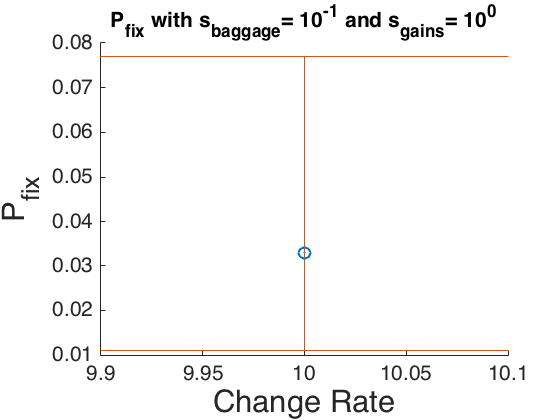

phat =

    0.0330


ci =

    0.0441    0.0219

In [23]:
phat
ci
figure
hold on
scatter(m,phat)
errorbar(m,phat,ci_minus, ci_plus,'.')
a = [ 'P_{fix} with s_{baggage}= 10^{-' , num2str(1), '} and s_{gains}= 10^{',num2str(0),'}'];
title(a, 'FontSize', 10);
xlabel('Change Rate', 'FontSize', fontSize);
ylabel('P_{fix}', 'FontSize', fontSize);

<h1>When S<sub>baggage</sub> = 0.1 and S<sub>gains</sub> = 1 and num_reps = 5000</h1>


This is to see how the size of the confidence interval changes as num_reps increases. It should decrease (the difference between ci_plus and ci_minus shuold get closer together) in size but this is see if my method behaves as predicted. I will also be running this same test using the MatLab function binofit() so see if num_reps effects the ci size. A brief summary of these results will be posted below.

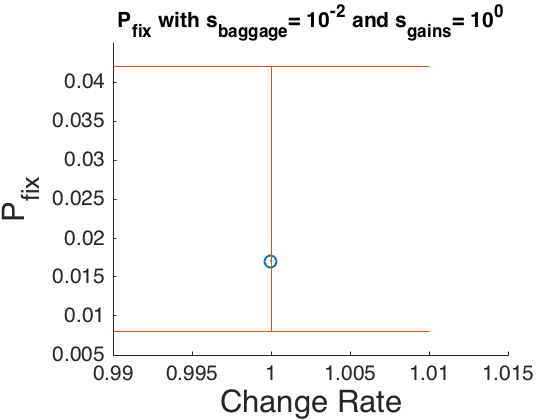

phat =

    0.0170


ci =

    0.0090    0.0250

In [25]:
%General Parameters
        N = 1000; %population size 
        num_loci = 1000;%number of loci in accessory genome
        m = [10]; %m = [1, 10,50, 100, 1000, 10000];
        mu_1 =  10^(-7);%mutation rate
        mu_2 = 100*mu_1;
        rev_mut = .001;
        num_essential = round(.25*num_loci);

    %scalar values of some things
        s_baggage = .1;%costs
        s_gains = 1; 
        frac_needed_scalar = .1; %fraction_needed 
        alpha= 1.96;
    %vector values of the same things things
        % weights = .1 * ones(1, num_loci);%vector of length "num_loci" denoting fitness contribution 
        %             %of each functional locus when needed
        % costs = .001 * ones(1, num_loci);%vector denoting fitness cost of functional loci when not needed
        % fraction_needed = .1 * ones(1, num_loci);%vector denoting fraction of environments each locus is needed
    
        
    %simulation parameters
        num_reps = 5000; %number of replicate runs
    %initialize data structures
        is_fixed = zeros(length(m), num_reps);
        stop_time = zeros(length(m), num_reps);
        m_array_index = 0;
       



    
%for the figure
    close all;
    fontSize = 15;
    
   
    
    

for l = m
    
    change_rate = l;%number of gens btwn environmental changes
    m_array_index = m_array_index+1;
    for j = 1:num_reps
        pop = [N-1,ones(1,num_loci),mu_1;1,ones(1,num_loci),mu_2]; %starts all individuals with all functional loci
        rand_vect = rand(1,num_loci); %initializes with a random environment
        env = rand_vect<=frac_needed_scalar;
        k=1;
        counter = round((rand)*(change_rate - 1));
        while k == 1

            counter = counter + 1;
            
            if mod(counter,change_rate)==0 %determines if environment should change this generation
                rand_vect = rand(1,num_loci); %initializes with a random environment
                env = rand_vect<=frac_needed_scalar; %resets each environment
            end

            pop = mutate3(pop, rev_mut, num_essential); %mutate population
            %%%%%%%%%%% deals with extinction %%%%%%%%%%%%%%%%%%%
            if (size(pop,1) == 1) && (isnan(pop(:,2)))
                break
            end
            %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

            fitnesses = compute_fitness3(pop,s_gains,env,s_baggage); %computes fitnesses for each unique genotype
            
            pop = wright_fisher2(fitnesses); %performs wright_fisher sampling to update population to next generation
            
            index = find(m == change_rate);
            
            mu_poly = unique(pop(:, end));
            if length(mu_poly) == 1
                k = 0;
                if mu_poly == mu_1
                    is_fixed(index,j) = 0;
                    stop_time(index,j)= counter;
                elseif mu_poly == mu_2
                    is_fixed(index,j) = 1;
                    stop_time(index,j)= counter;

                else
                     error('Value other than 0 or 1 are not permited')
                end
            end

        
               
        end


    end
    
end

pfix_cr10 = sum(is_fixed(1,:),2)/num_reps;
phat =[pfix_cr10]
se = sqrt(((1-phat).*(phat))./N);
ci_plus = phat + alpha*se;
ci_minus = phat - alpha*se;
ci = [ci_minus, ci_plus]
figure
hold on
scatter(1,phat)
errorbar(1,phat,ci_minus, ci_plus,'.')
a = [ 'P_{fix} with s_{baggage}= 10^{-' , num2str(2), '} and s_{gains}= 10^{',num2str(0),'}'];
title(a, 'FontSize', 10);
xlabel('Change Rate', 'FontSize', fontSize);
ylabel('P_{fix}', 'FontSize', fontSize);

*Correction* s<sub>baggage</sub> is 10<sup>-1</sup>

In [26]:
 ci_plus - ci_minus

ans =

    0.0160

This what I expected to see! With the binofit() function, the distance bewteen ci_plus and ci_minus (.01030) is smaller.

<h1>Tests trying to improve the statistical significance of P<sub>fix</sub> by modifying s<sub>gains</sub> and s<sub>baggage</sub></h1>

These tests will look to see how modifying s<sub>gains</sub> and s<sub>baggage</sub> increases P<sub>fix</sub> by a statistically signifiacnt amount.

<h2>When s<sub>gains</sub> = .9 and s<sub>baggage</sub> = .009

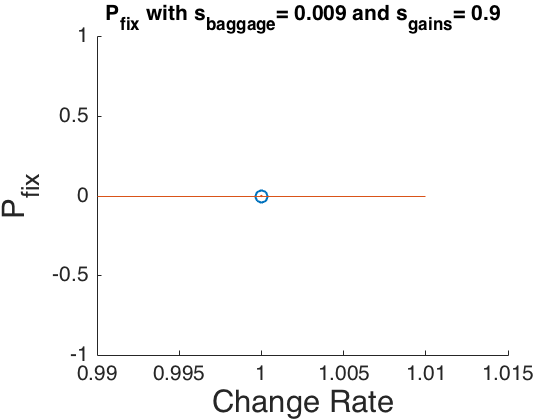

phat =

     0


ci =

     0     0

In [27]:
%General Parameters
        N = 1000; %population size 
        num_loci = 1000;%number of loci in accessory genome
        m = [10]; %m = [1, 10,50, 100, 1000, 10000];
        mu_1 =  10^(-7);%mutation rate
        mu_2 = 100*mu_1;
        rev_mut = .001;
        num_essential = round(.25*num_loci);

    %scalar values of some things
        s_baggage = .009;%costs
        s_gains = .9; 
        frac_needed_scalar = .1; %fraction_needed 
        alpha= 1.96;
    %vector values of the same things things
        % weights = .1 * ones(1, num_loci);%vector of length "num_loci" denoting fitness contribution 
        %             %of each functional locus when needed
        % costs = .001 * ones(1, num_loci);%vector denoting fitness cost of functional loci when not needed
        % fraction_needed = .1 * ones(1, num_loci);%vector denoting fraction of environments each locus is needed
    
        
    %simulation parameters
        num_reps = 1000; %number of replicate runs
    %initialize data structures
        is_fixed = zeros(length(m), num_reps);
        stop_time = zeros(length(m), num_reps);
        m_array_index = 0;
       



    
%for the figure
    close all;
    fontSize = 15;
    
   
    
    

for l = m
    
    change_rate = l;%number of gens btwn environmental changes
    m_array_index = m_array_index+1;
    for j = 1:num_reps
        pop = [N-1,ones(1,num_loci),mu_1;1,ones(1,num_loci),mu_2]; %starts all individuals with all functional loci
        rand_vect = rand(1,num_loci); %initializes with a random environment
        env = rand_vect<=frac_needed_scalar;
        k=1;
        counter = round((rand)*(change_rate - 1));
        while k == 1

            counter = counter + 1;
            
            if mod(counter,change_rate)==0 %determines if environment should change this generation
                rand_vect = rand(1,num_loci); %initializes with a random environment
                env = rand_vect<=frac_needed_scalar; %resets each environment
            end

            pop = mutate3(pop, rev_mut, num_essential); %mutate population
            %%%%%%%%%%% deals with extinction %%%%%%%%%%%%%%%%%%%
            if (size(pop,1) == 1) && (isnan(pop(:,2)))
                break
            end
            %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

            fitnesses = compute_fitness3(pop,s_gains,env,s_baggage); %computes fitnesses for each unique genotype
            
            pop = wright_fisher2(fitnesses); %performs wright_fisher sampling to update population to next generation
            
            index = find(m == change_rate);
            
            mu_poly = unique(pop(:, end));
            if length(mu_poly) == 1
                k = 0;
                if mu_poly == mu_1
                    is_fixed(index,j) = 0;
                    stop_time(index,j)= counter;
                elseif mu_poly == mu_2
                    is_fixed(index,j) = 1;
                    stop_time(index,j)= counter;

                else
                     error('Value other than 0 or 1 are not permited')
                end
            end

        
               
        end


    end
    
end

pfix_cr10 = sum(is_fixed(1,:),2)/num_reps;
phat =[pfix_cr10]
se = sqrt(((1-phat).*(phat))./N);
ci_plus = phat + alpha*se;
ci_minus = phat - alpha*se;
ci = [ci_minus, ci_plus]
figure
hold on
scatter(1,phat)
errorbar(1,phat,ci_minus, ci_plus,'.')
a = [ 'P_{fix} with s_{baggage}= ' , num2str(s_baggage), ' and s_{gains}= ',num2str(s_gains),''];
title(a, 'FontSize', 10);
xlabel('Change Rate', 'FontSize', fontSize);
ylabel('P_{fix}', 'FontSize', fontSize);

<h2>When s<sub>gains</sub> = 1 and s<sub>baggage</sub> = .001

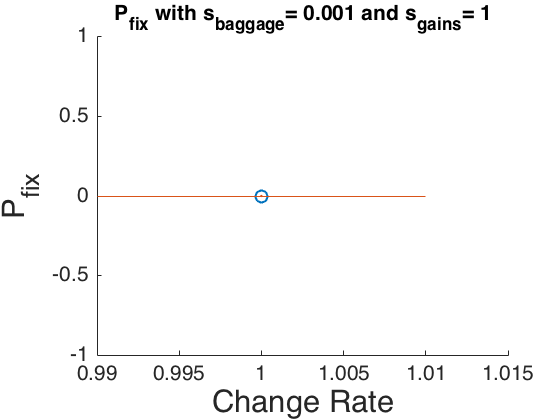

phat =

     0


ci =

     0     0

In [28]:
%General Parameters
        N = 1000; %population size 
        num_loci = 1000;%number of loci in accessory genome
        m = [10]; %m = [1, 10,50, 100, 1000, 10000];
        mu_1 =  10^(-7);%mutation rate
        mu_2 = 100*mu_1;
        rev_mut = .001;
        num_essential = round(.25*num_loci);

    %scalar values of some things
        s_baggage = .001;%costs
        s_gains = 1; 
        frac_needed_scalar = .1; %fraction_needed 
        alpha= 1.96;
    %vector values of the same things things
        % weights = .1 * ones(1, num_loci);%vector of length "num_loci" denoting fitness contribution 
        %             %of each functional locus when needed
        % costs = .001 * ones(1, num_loci);%vector denoting fitness cost of functional loci when not needed
        % fraction_needed = .1 * ones(1, num_loci);%vector denoting fraction of environments each locus is needed
    
        
    %simulation parameters
        num_reps = 1000; %number of replicate runs
    %initialize data structures
        is_fixed = zeros(length(m), num_reps);
        stop_time = zeros(length(m), num_reps);
        m_array_index = 0;
       



    
%for the figure
    close all;
    fontSize = 15;
    
   
    
    

for l = m
    
    change_rate = l;%number of gens btwn environmental changes
    m_array_index = m_array_index+1;
    for j = 1:num_reps
        pop = [N-1,ones(1,num_loci),mu_1;1,ones(1,num_loci),mu_2]; %starts all individuals with all functional loci
        rand_vect = rand(1,num_loci); %initializes with a random environment
        env = rand_vect<=frac_needed_scalar;
        k=1;
        counter = round((rand)*(change_rate - 1));
        while k == 1

            counter = counter + 1;
            
            if mod(counter,change_rate)==0 %determines if environment should change this generation
                rand_vect = rand(1,num_loci); %initializes with a random environment
                env = rand_vect<=frac_needed_scalar; %resets each environment
            end

            pop = mutate3(pop, rev_mut, num_essential); %mutate population
            %%%%%%%%%%% deals with extinction %%%%%%%%%%%%%%%%%%%
            if (size(pop,1) == 1) && (isnan(pop(:,2)))
                break
            end
            %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

            fitnesses = compute_fitness3(pop,s_gains,env,s_baggage); %computes fitnesses for each unique genotype
            
            pop = wright_fisher2(fitnesses); %performs wright_fisher sampling to update population to next generation
            
            index = find(m == change_rate);
            
            mu_poly = unique(pop(:, end));
            if length(mu_poly) == 1
                k = 0;
                if mu_poly == mu_1
                    is_fixed(index,j) = 0;
                    stop_time(index,j)= counter;
                elseif mu_poly == mu_2
                    is_fixed(index,j) = 1;
                    stop_time(index,j)= counter;

                else
                     error('Value other than 0 or 1 are not permited')
                end
            end

        
               
        end


    end
    
end

pfix_cr10 = sum(is_fixed(1,:),2)/num_reps;
phat =[pfix_cr10]
se = sqrt(((1-phat).*(phat))./N);
ci_plus = phat + alpha*se;
ci_minus = phat - alpha*se;
ci = [ci_minus, ci_plus]
figure
hold on
scatter(1,phat)
errorbar(1,phat,ci_minus, ci_plus,'.')
a = [ 'P_{fix} with s_{baggage}= ' , num2str(s_baggage), ' and s_{gains}= ',num2str(s_gains),''];
title(a, 'FontSize', 10);
xlabel('Change Rate', 'FontSize', fontSize);
ylabel('P_{fix}', 'FontSize', fontSize);

<h2>When s<sub>gains</sub> = 100 and s<sub>baggage</sub> = .001

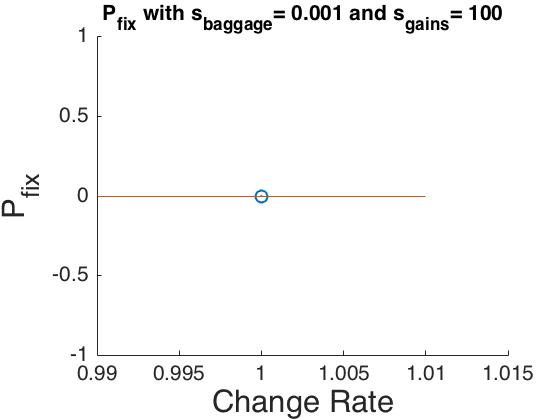

phat =

     0


ci =

     0     0

In [29]:
%General Parameters
        N = 1000; %population size 
        num_loci = 1000;%number of loci in accessory genome
        m = [10]; %m = [1, 10,50, 100, 1000, 10000];
        mu_1 =  10^(-7);%mutation rate
        mu_2 = 100*mu_1;
        rev_mut = .001;
        num_essential = round(.25*num_loci);

    %scalar values of some things
        s_baggage = .001;%costs
        s_gains = 100; 
        frac_needed_scalar = .1; %fraction_needed 
        alpha= 1.96;
    %vector values of the same things things
        % weights = .1 * ones(1, num_loci);%vector of length "num_loci" denoting fitness contribution 
        %             %of each functional locus when needed
        % costs = .001 * ones(1, num_loci);%vector denoting fitness cost of functional loci when not needed
        % fraction_needed = .1 * ones(1, num_loci);%vector denoting fraction of environments each locus is needed
    
        
    %simulation parameters
        num_reps = 1000; %number of replicate runs
    %initialize data structures
        is_fixed = zeros(length(m), num_reps);
        stop_time = zeros(length(m), num_reps);
        m_array_index = 0;
       



    
%for the figure
    close all;
    fontSize = 15;
    
   
    
    

for l = m
    
    change_rate = l;%number of gens btwn environmental changes
    m_array_index = m_array_index+1;
    for j = 1:num_reps
        pop = [N-1,ones(1,num_loci),mu_1;1,ones(1,num_loci),mu_2]; %starts all individuals with all functional loci
        rand_vect = rand(1,num_loci); %initializes with a random environment
        env = rand_vect<=frac_needed_scalar;
        k=1;
        counter = round((rand)*(change_rate - 1));
        while k == 1

            counter = counter + 1;
            
            if mod(counter,change_rate)==0 %determines if environment should change this generation
                rand_vect = rand(1,num_loci); %initializes with a random environment
                env = rand_vect<=frac_needed_scalar; %resets each environment
            end

            pop = mutate3(pop, rev_mut, num_essential); %mutate population
            %%%%%%%%%%% deals with extinction %%%%%%%%%%%%%%%%%%%
            if (size(pop,1) == 1) && (isnan(pop(:,2)))
                break
            end
            %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

            fitnesses = compute_fitness3(pop,s_gains,env,s_baggage); %computes fitnesses for each unique genotype
            
            pop = wright_fisher2(fitnesses); %performs wright_fisher sampling to update population to next generation
            
            index = find(m == change_rate);
            
            mu_poly = unique(pop(:, end));
            if length(mu_poly) == 1
                k = 0;
                if mu_poly == mu_1
                    is_fixed(index,j) = 0;
                    stop_time(index,j)= counter;
                elseif mu_poly == mu_2
                    is_fixed(index,j) = 1;
                    stop_time(index,j)= counter;

                else
                     error('Value other than 0 or 1 are not permited')
                end
            end

        
               
        end


    end
    
end

pfix_cr10 = sum(is_fixed(1,:),2)/num_reps;
phat =[pfix_cr10]
se = sqrt(((1-phat).*(phat))./N);
ci_plus = phat + alpha*se;
ci_minus = phat - alpha*se;
ci = [ci_minus, ci_plus]
figure
hold on
scatter(1,phat)
errorbar(1,phat,ci_minus, ci_plus,'.')
a = [ 'P_{fix} with s_{baggage}= ' , num2str(s_baggage), ' and s_{gains}= ',num2str(s_gains),''];
title(a, 'FontSize', 10);
xlabel('Change Rate', 'FontSize', fontSize);
ylabel('P_{fix}', 'FontSize', fontSize);